## This notebook is for generating test figures of some of the clusters in the database

Once we pick out the most important features, we'll want to make some comparisons between, for example, the least and most concentrated cluster in the sample with a relatively fixed mass/redshift.

In [20]:
import numpy as np
from astropy.io import fits
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from useful_functions.plotter import plot
from pathlib import Path
from os.path import expanduser
%matplotlib inline

In [21]:
#TODO: Regenerate all of these figures with the morphological parameters calculated using idealized, no background
#Then, use the images with no background

In [22]:
fig_dir = Path('../figs/')
home_dir = Path(expanduser('~'))
chandra_dir = home_dir / 'magneticum_chandra'
erosita_no_bg_dir = home_dir / 'magneticum_no_bg'

use_dir = chandra_dir

In [23]:
if(use_dir == chandra_dir):
    center_lower = 1035
    center_upper = 1035
elif(use_dir == erosita_no_bg_dir):
    center_lower = 191
    center_upper = 192
    
clusterlist = np.load(use_dir / 'clusterList.npy')

In [24]:
# need to automatically come up with radius and image size

# chandra is 2071 x 2071, so the 1036th elt is center (#1035 in python)

In [25]:
#most caS: 870979 w/ radius 78.9261 pix (and largest caS value)
#high caS: 870978 w/ radius 71.596748 pix
#lower caS: 921366 w/ radius 22.445345 pix

#low c 871046 w/ rad 55.569275 pix and c=0.112303
#high c: 871048 w/ radius 54.675224 and c=0.312904

In [26]:
def gen_plot(cluster_id):
    head = fits.open(use_dir / ('%d.fits' % cluster_id))
    data = fits.open(use_dir / ('%d.fits' % cluster_id))[0].data

    print(np.sum(data))

    masked_array = np.log10(np.ma.array (data, mask=(data==0)));
    cmap = cm.plasma
    cmap.set_bad('black',1.)
    fig, ax = plot()
    ax.imshow(masked_array, interpolation='nearest', cmap=cmap, origin='lower')
    plt.axis('off')
    #plt.xlabel('$x$')
    #plt.ylabel('$y$')
    #plt.title('Sample cluster, log10 transform pixel count')
    rad = clusterlist['R500_pixel'][clusterlist['id'] == cluster_id] #54.675224
    plt.xlim(center_lower-rad,center_upper+rad)
    plt.ylim(center_lower-rad,center_upper+rad)
    return fig,ax

1094362.0


C:\Users\leets\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


(<Figure size 504x417.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16d219b0cc0>)

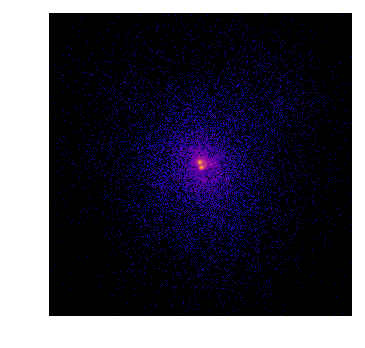

In [27]:
#for cluster 871048
#high c: 871048 w/ radius 54.675224 and c=0.312904

# we will eventually want to control brightness of image by setting up/low bounds for cmap

cluster_id = 871048
gen_plot(cluster_id)
#plt.savefig(fig_dir / ('high_c_%d.pdf' % cluster_id), bbox_inches='tight')

1062679.0


C:\Users\leets\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


(<Figure size 504x417.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16d21957240>)

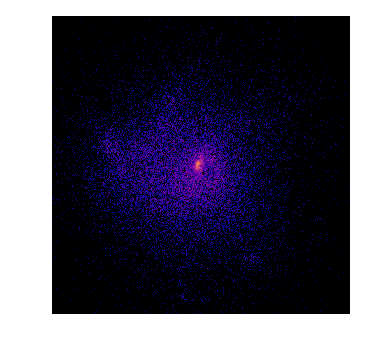

In [28]:
#low c 871046 w/ rad 55.569275 pix and c=0.112303

cluster_id = 871046
gen_plot(cluster_id)
#plt.savefig(fig_dir / ('low_c_%d.pdf' % cluster_id), bbox_inches='tight')

1178746.0


C:\Users\leets\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


(<Figure size 504x417.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16d21cb9630>)

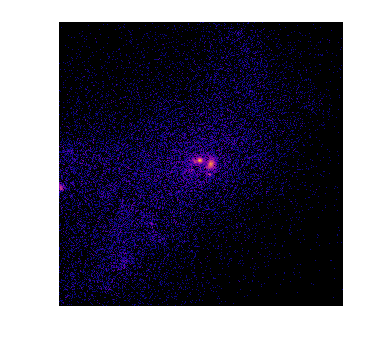

In [29]:
#high cAs 870985 with r=58.50007 and A=1.40496

cluster_id = 870985
gen_plot(cluster_id)
#plt.savefig(fig_dir / ('high_cAs_%d.pdf' % cluster_id), bbox_inches='tight')

1252819.0


C:\Users\leets\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


(<Figure size 504x417.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16d213ebc18>)

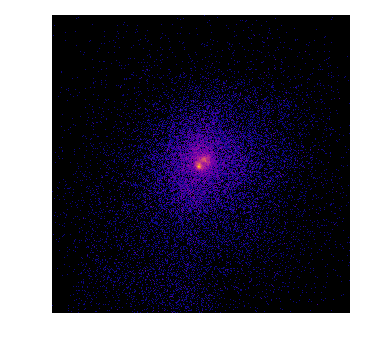

In [30]:
#low cAs 871011 with r=55.668118 and A=1.11006

cluster_id = 871011
gen_plot(cluster_id)
#plt.savefig(fig_dir / ('low_cAs_%d.pdf' % cluster_id), bbox_inches='tight')

959373.0


C:\Users\leets\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


(<Figure size 504x417.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16d23504128>)

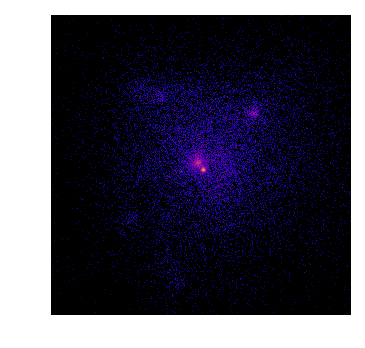

In [31]:
#high caS 871034 with r=55.1924 and S=0.97628

cluster_id = 871034
gen_plot(cluster_id)
#plt.savefig(fig_dir / ('high_caS_%d.pdf' % cluster_id), bbox_inches='tight')

1469451.0


C:\Users\leets\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


(<Figure size 504x417.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16d21978208>)

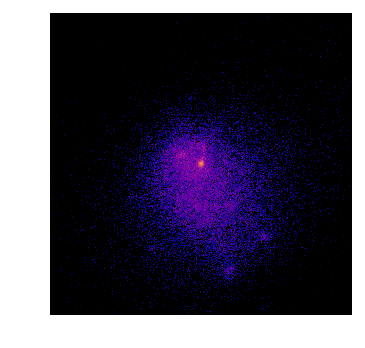

In [32]:
#high caS 871060 with r=54.8898 and S=0.695919

cluster_id = 871060
gen_plot(cluster_id)
#plt.savefig(fig_dir / ('low_caS_%d.pdf' % cluster_id), bbox_inches='tight')